In [2]:
import pandas as pd
import numpy as np

In [3]:
RANDOM_STATE = 42
results = pd.DataFrame(columns = ['model', 'task', 'accuracy'])

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [4]:
data = pd.read_csv('winequality-red.csv', sep = ';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1.Разделите выборку на обучающую и тестовую в отношении 70%/30%, предварительно выделив целевую переменную (колонка 'quality').

In [5]:


### Ваш код ###
from sklearn.model_selection import train_test_split
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into 70/30 training/testing sets
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
display(le.classes_)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

array([3, 4, 5, 6, 7, 8], dtype=int64)

2.Оцените качество на тестовой выборке по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [6]:


### Ваш код ###

acc_DT = 0
acc_Bagging = 0
acc_RF = 0

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_preds = dt.predict(X_test)

acc_DT = accuracy_score(y_test, dt_preds)

bc = BaggingClassifier(n_estimators=100)
bc.fit(X_train, y_train)

bc_preds = bc.predict(X_test)

acc_Bagging = accuracy_score(y_test, bc_preds)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)

# Evaluate accuracy
acc_RF = accuracy_score(y_test, rf_preds)

results.loc[0] = ['DecisionTreeClassifier', 'task2', acc_DT]
results.loc[1] = ['BaggingClassifier ', 'task2', acc_Bagging]
results.loc[2] = ['RandomForestClassifier', 'task2', acc_RF]
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.543750
1,BaggingClassifier,task2,0.647917
2,RandomForestClassifier,task2,0.662500


3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



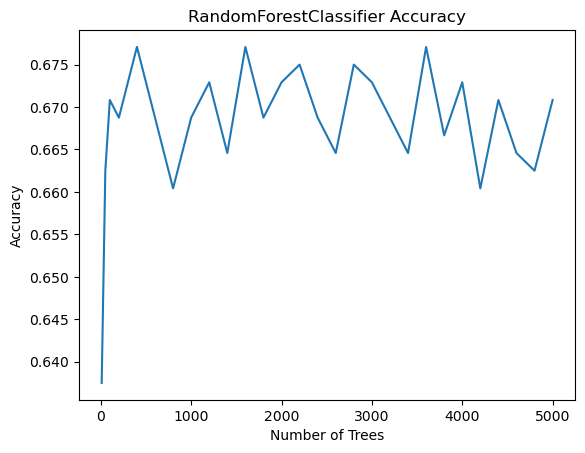

In [7]:


### Ваш код ###
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

n_trees = [10, 50, 100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000, 4200, 4400, 4600, 4800, 5000]
accuracies = []

for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n, n_jobs=-1)
    rf.fit(X_train, y_train)
    rf_preds = rf.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_preds)
    accuracies.append(rf_accuracy)

plt.plot(n_trees, accuracies)
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("RandomForestClassifier Accuracy")
plt.show()

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [8]:


### Ваш код ###

acc_sklearn = 0
acc_xgboost = 0

from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
acc_sklearn = cross_val_score(gb, X_test, y_test, cv=5, scoring="accuracy", n_jobs=-1).mean()

xgb_model = xgb.XGBClassifier()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

xgb_model.fit(X_train, y_train)
acc_xgboost = cross_val_score(xgb_model, X_test, y_test, scoring="accuracy").mean()

results.loc[3] = ['GradientBoostingClassifier', 'task4', acc_sklearn]
results.loc[4] = ['XGBClassifier', 'task4', acc_xgboost]
results

c:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 68

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.543750
1,BaggingClassifier,task2,0.647917
2,RandomForestClassifier,task2,0.662500
3,GradientBoostingClassifier,task4,0.560417
4,XGBClassifier,task4,NaN


5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [10]:


### Ваш код ###
from sklearn.model_selection import GridSearchCV
gb = GradientBoostingClassifier()
gb_params = {'learning_rate': [0.1, 0.01, 0.001],
              'n_estimators': [100, 500, 1000],
              'max_depth': [1, 3, 5, 7]}
gbc_grid = GridSearchCV(gb, gb_params, cv=3, n_jobs=-1)
gbc_grid.fit(X_train, y_train)
print('Параметры лучшей модели sklearn:\n', gbc_grid.best_params_)
# XGBoost
xgbc = xgb.XGBClassifier()
xgbc_params = {'learning_rate': [0.1, 0.01, 0.001],
               'n_estimators': [100, 500, 1000],
               'max_depth': [1, 3, 5, 7]}
xgbc_grid = GridSearchCV(xgbc, xgbc_params, cv=3, n_jobs=-1)
xgbc_grid.fit(X_train, y_train)
print('Параметры лучшей модели xgboost:\n', xgbc_grid.best_params_)
acc_sklearn_cv = 0
acc_xgboost_cv = 0
results.loc[5] = ['GradientBoostingClassifier_CV', 'task5', gbc_grid.best_score_]
results.loc[6] = ['XGBClassifier_CV', 'task5', xgbc_grid.best_score_]

Параметры лучшей модели sklearn:
 {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500}
Параметры лучшей модели xgboost:
 {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1000}


6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [11]:


### Ваш код ###
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

# LightGBM
lightgbm = lgb.LGBMClassifier()
lightgbm_scores = cross_val_score(lightgbm, X_train, y_train, cv=3, n_jobs=-1)
acc_lightgbm = lightgbm_scores.mean()

# CatBoost
catboost = CatBoostClassifier()
catboost_scores = cross_val_score(catboost, X_train, y_train, cv=3, n_jobs=-1)
acc_catboost = catboost_scores.mean()

results.loc[7] = ['LGBMClassifier', 'task6', acc_lightgbm]
results.loc[8] = ['CatBoostClassifier', 'task6', acc_catboost]
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.543750
1,BaggingClassifier,task2,0.647917
2,RandomForestClassifier,task2,0.662500
3,GradientBoostingClassifier,task4,0.560417
4,XGBClassifier,task4,NaN
5,GradientBoostingClassifier_CV,task5,0.641644
6,XGBClassifier_CV,task5,0.638070
7,LGBMClassifier,task6,0.623771
8,CatBoostClassifier,task6,0.626452


7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями.
Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [17]:


### Ваш код ###
import lightgbm as lgb
import catboost as cb


lgb_params = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7]
}

cb_params = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'depth': [3, 5, 7]
}

model_lgb = lgb.LGBMClassifier()
grid_lgb = GridSearchCV(model_lgb, lgb_params, cv=3, n_jobs=-1)
grid_lgb.fit(X_train, y_train)
print('Параметры лучшей модели lightgbm:\n', grid_lgb.best_params_)

model_cb = cb.CatBoostClassifier()
grid_cb = GridSearchCV(model_cb, cb_params, cv=3, n_jobs=-1)
grid_cb.fit(X_train, y_train)
print('Параметры лучшей модели catboost:\n', grid_cb.best_params_)

results.loc[9] = ['LGBMClassifier_CV', 'task7', grid_lgb.best_score_]
results.loc[10] = ['CatBoostClassifier_CV', 'task7', grid_cb.best_score_]

Параметры лучшей модели lightgbm:
 {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
0:	learn: 1.5389929	total: 6.93ms	remaining: 1.38s
1:	learn: 1.3908540	total: 13.6ms	remaining: 1.35s
2:	learn: 1.2798960	total: 20.1ms	remaining: 1.32s
3:	learn: 1.2013604	total: 27.2ms	remaining: 1.33s
4:	learn: 1.1442160	total: 33.9ms	remaining: 1.32s
5:	learn: 1.0892953	total: 40.6ms	remaining: 1.31s
6:	learn: 1.0469444	total: 47.1ms	remaining: 1.3s
7:	learn: 1.0111858	total: 53.6ms	remaining: 1.28s
8:	learn: 0.9770110	total: 60.6ms	remaining: 1.28s
9:	learn: 0.9480953	total: 67.2ms	remaining: 1.28s
10:	learn: 0.9262368	total: 74ms	remaining: 1.27s
11:	learn: 0.9042232	total: 80.4ms	remaining: 1.26s
12:	learn: 0.8860371	total: 86.9ms	remaining: 1.25s
13:	learn: 0.8672617	total: 93.8ms	remaining: 1.25s
14:	learn: 0.8476036	total: 100ms	remaining: 1.24s
15:	learn: 0.8373197	total: 107ms	remaining: 1.23s
16:	learn: 0.8215999	total: 114ms	remaining: 1.22s
17:	learn: 0.8119330	total: 120ms	rem

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [optuna](https://github.com/optuna/optuna) . Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [13]:


### Ваш код ###
import optuna
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import warnings
optuna.logging.set_verbosity(optuna.logging.WARNING)
warnings.filterwarnings('ignore')


def optimize_xgboost(trial):
    learning_rate = trial.suggest_uniform('learning_rate', 0.01, 1.0)
    n_estimators = trial.suggest_int('n_estimators', 10, 500)
    max_depth = trial.suggest_int('max_depth', 1, 20)
    
    xgboost = xgb.XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
    accuracy = np.mean(cross_val_score(xgboost, X, y, cv=3, scoring='accuracy'))
    return -accuracy

study = optuna.create_study()
study.optimize(optimize_xgboost, n_trials=50)

best_params_xgboost_optuna = study.best_params
acc_xgboost_optuna = -study.best_value

print('Параметры лучшей модели xgboost:\n', best_params_xgboost_optuna)
results.loc[11] = ['XGBClassifier_optuna', 'task8', acc_xgboost_optuna]
results

Параметры лучшей модели xgboost:
 {'learning_rate': 0.2257699711441378, 'n_estimators': 223, 'max_depth': 1}


,model,task,accuracy
0,DecisionTreeClassifier,task2,0.543750
1,BaggingClassifier,task2,0.647917
2,RandomForestClassifier,task2,0.662500
3,GradientBoostingClassifier,task4,0.560417
4,XGBClassifier,task4,NaN
5,GradientBoostingClassifier_CV,task5,0.641644
6,XGBClassifier_CV,task5,0.638070
7,LGBMClassifier,task6,0.623771
8,CatBoostClassifier,task6,0.626452
9,LGBMClassifier_CV,task7,0.631814


9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [14]:


### Ваш код ###

from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

xgb = XGBClassifier()
lgbm = LGBMClassifier()
cat = CatBoostClassifier()
gb = GradientBoostingClassifier()

model = StackingClassifier(estimators=[('xgb', xgb), ('lgbm', lgbm), ('cat', cat), ('gb', gb)])

scores = cross_val_score(model, X, y, cv=3, scoring='accuracy')

acc_stacking_default = 0
results.loc[12] = ['Stacking default', 'task9', scores.mean()]
results

Learning rate set to 0.079385
0:	learn: 1.6849660	total: 17.2ms	remaining: 17.2s
1:	learn: 1.5981378	total: 20.5ms	remaining: 10.2s
2:	learn: 1.5265676	total: 23.5ms	remaining: 7.8s
3:	learn: 1.4683407	total: 26.5ms	remaining: 6.61s
4:	learn: 1.4077189	total: 29.7ms	remaining: 5.91s
5:	learn: 1.3570271	total: 33.1ms	remaining: 5.48s
6:	learn: 1.3088985	total: 36ms	remaining: 5.1s
7:	learn: 1.2713430	total: 38.8ms	remaining: 4.81s
8:	learn: 1.2363207	total: 41.7ms	remaining: 4.59s
9:	learn: 1.2054282	total: 44.9ms	remaining: 4.44s
10:	learn: 1.1748954	total: 48.1ms	remaining: 4.32s
11:	learn: 1.1476818	total: 50.8ms	remaining: 4.18s
12:	learn: 1.1226823	total: 53.5ms	remaining: 4.06s
13:	learn: 1.0987666	total: 56.1ms	remaining: 3.95s
14:	learn: 1.0787027	total: 58.8ms	remaining: 3.86s
15:	learn: 1.0604029	total: 61.5ms	remaining: 3.78s
16:	learn: 1.0426485	total: 64.5ms	remaining: 3.73s
17:	learn: 1.0247313	total: 67.2ms	remaining: 3.67s
18:	learn: 1.0092929	total: 69.9ms	remaining: 3.

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.543750
1,BaggingClassifier,task2,0.647917
2,RandomForestClassifier,task2,0.662500
3,GradientBoostingClassifier,task4,0.560417
4,XGBClassifier,task4,NaN
5,GradientBoostingClassifier_CV,task5,0.641644
6,XGBClassifier_CV,task5,0.638070
7,LGBMClassifier,task6,0.623771
8,CatBoostClassifier,task6,0.626452
9,LGBMClassifier_CV,task7,0.631814


10..Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать

In [18]:


### Ваш код ###
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

xgb = XGBClassifier(**{'learning_rate': 0.2257699711441378, 'n_estimators': 223, 'max_depth': 1})
lgbm = LGBMClassifier(**{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200})
cat = CatBoostClassifier(**{'depth': 7, 'learning_rate': 0.2, 'n_estimators': 200})
gb = GradientBoostingClassifier(**{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100})

model = StackingClassifier(estimators=[('xgb', xgb), ('lgbm', lgbm), ('cat', cat), ('gb', gb)])

scores_10 = cross_val_score(model, X, y, cv=3, scoring='accuracy')

results.loc[12] = ['Stacking default', 'task9', scores_10.mean()]
results
results.loc[13] = ['Stacking', 'task10', scores.mean()]

0:	learn: 1.5537920	total: 6.32ms	remaining: 1.26s
1:	learn: 1.4105888	total: 12.8ms	remaining: 1.27s
2:	learn: 1.2892601	total: 19.7ms	remaining: 1.29s
3:	learn: 1.2099853	total: 26.1ms	remaining: 1.28s
4:	learn: 1.1433327	total: 32.3ms	remaining: 1.26s
5:	learn: 1.0823553	total: 38.4ms	remaining: 1.24s
6:	learn: 1.0357229	total: 45.1ms	remaining: 1.24s
7:	learn: 0.9977402	total: 51.3ms	remaining: 1.23s
8:	learn: 0.9591228	total: 57.3ms	remaining: 1.22s
9:	learn: 0.9289075	total: 63.5ms	remaining: 1.21s
10:	learn: 0.9013093	total: 69.6ms	remaining: 1.2s
11:	learn: 0.8758835	total: 75.7ms	remaining: 1.19s
12:	learn: 0.8566399	total: 82.3ms	remaining: 1.18s
13:	learn: 0.8342954	total: 88.3ms	remaining: 1.17s
14:	learn: 0.8170508	total: 95ms	remaining: 1.17s
15:	learn: 0.8036745	total: 101ms	remaining: 1.16s
16:	learn: 0.7908611	total: 107ms	remaining: 1.15s
17:	learn: 0.7773972	total: 114ms	remaining: 1.15s
18:	learn: 0.7646300	total: 119ms	remaining: 1.14s
19:	learn: 0.7528996	total: 1

In [16]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.543750
1,BaggingClassifier,task2,0.647917
2,RandomForestClassifier,task2,0.662500
3,GradientBoostingClassifier,task4,0.560417
4,XGBClassifier,task4,NaN
5,GradientBoostingClassifier_CV,task5,0.641644
6,XGBClassifier_CV,task5,0.638070
7,LGBMClassifier,task6,0.623771
8,CatBoostClassifier,task6,0.626452
9,LGBMClassifier_CV,task7,0.631814
